===== LASSO REGRESSION =====
RMSE: 0.4156349202880472
R² Score: 0.9472896281706079
Coefficients: [ 0.51844043 -0.10251673  1.58636102]
Intercept: -0.8483620078432859 

===== RIDGE REGRESSION =====
RMSE: 0.36035540223988693
R² Score: 0.9603782095058316
Coefficients: [ 0.72451829 -0.63499585  1.46403593]
Intercept: -0.2704777214683185 



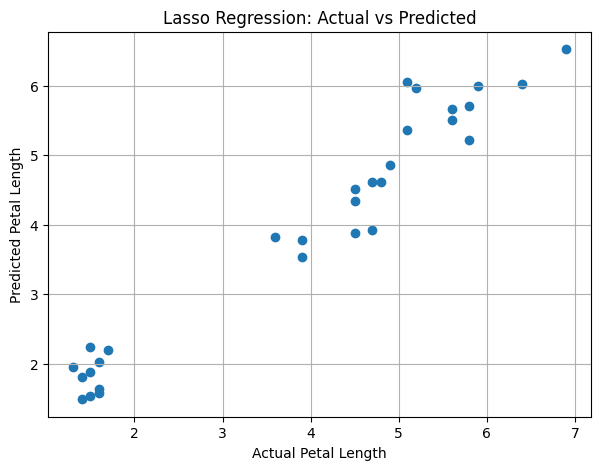

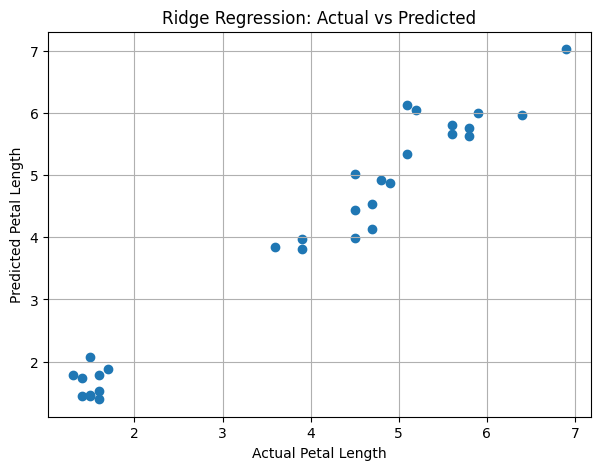

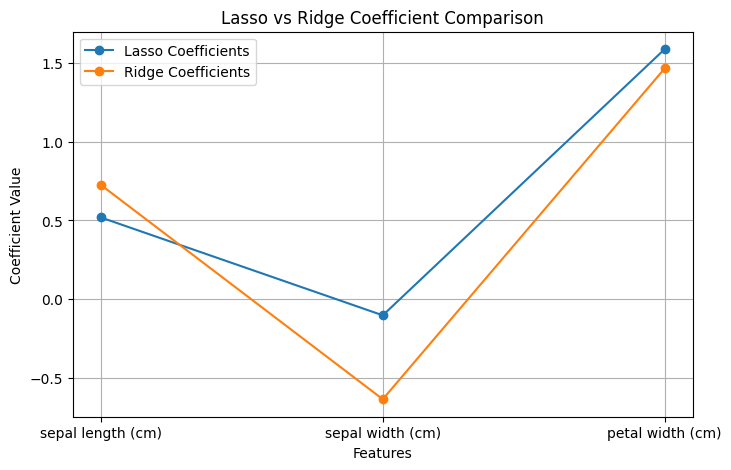

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

X = df.drop("petal length (cm)", axis=1)
y = df["petal length (cm)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)

print("===== LASSO REGRESSION =====")
print("RMSE:", lasso_rmse)
print("R² Score:", lasso_r2)
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_, "\n")

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

print("===== RIDGE REGRESSION =====")
print("RMSE:", ridge_rmse)
print("R² Score:", ridge_r2)
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_, "\n")

plt.figure(figsize=(7,5))
plt.scatter(y_test, lasso_pred)
plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Lasso Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(y_test, ridge_pred)
plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Ridge Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
labels = X.columns

plt.plot(labels, lasso.coef_, marker='o', label="Lasso Coefficients")
plt.plot(labels, ridge.coef_, marker='o', label="Ridge Coefficients")
plt.title("Lasso vs Ridge Coefficient Comparison")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()
